In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Load COVID-19 Data into Pandas
cv19_df = pd.read_csv("../data_files/internet_sources/CovidStatesData.csv")

In [4]:
#Create COVID-19 Dataframe
subset_cv19_df = cv19_df.loc[cv19_df['date'] >= '2020-02-01']
subset_cv19_df = subset_cv19_df.loc[subset_cv19_df['date'] <= '2020-04-31']
subset_cv19_df = subset_cv19_df[['date','state','cases','deaths']]
subset_cv19_df = subset_cv19_df.rename(columns={'date':'Date', 'state':'State', 'cases':'Cases', 'deaths':'Deaths'})

In [5]:
#Group COVID-19 data by date to get US totals
grouped_cv19 = subset_cv19_df.groupby(["Date"])
cv19_datesums_df = grouped_cv19.sum()
cv19_datesums_df

,Cases,Deaths
Date,,
2020-02-01,8,0
2020-02-02,11,0
2020-02-03,11,0
2020-02-04,11,0
2020-02-05,12,0
...,...,...
2020-04-08,429319,14803
2020-04-09,463684,16674
2020-04-10,496912,18712


In [33]:
#Move Date data from index to column for plotting, truncate dates after 3/31
cv19_date_df = cv19_datesums_df.reset_index()
cv19_date_df = cv19_date_df.loc[cv19_date_df["Date"] <= "2020-03-31", :]
cv19_date_df["Date"] = cv19_date_df['Date'].astype('str') 
cv19_date_df.dtypes

Date      object
Cases      int64
Deaths     int64
dtype: object

In [6]:
#Load DJIA Historical Data into Pandas
df_stocktrend = pd.read_csv("../data_files/output/DJIAINFO.csv")
df_stocktrend
df_stocktrend['Date'] = pd.to_datetime(df_stocktrend['Date'])
df_stocktrend

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000
...,...,...,...,...,...,...,...
8867,2020-04-03,21285.929690,21447.810550,20863.089840,21052.529300,21052.529300,450010000
8868,2020-04-06,21693.630860,22783.449220,21693.630860,22679.990230,22679.990230,610760000
8869,2020-04-07,23537.439450,23617.240230,22634.449220,22653.859380,22653.859380,594660000
8870,2020-04-08,22893.470700,23513.400390,22682.990230,23433.570310,23433.570310,472740000


In [56]:
start_date = '02/01/2020'
end_date = '03/31/2020'
after_start_date = df_stocktrend["Date"] >= start_date
before_end_date = df_stocktrend["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
df_covid = df_stocktrend.loc[between_two_dates]
df_covid["Date"] = df_covid['Date'].astype('str') 
df_covid

C:\ProgramData\Anaconda3\envs\PythonData2020_1\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Open,High,Low,Close,Adj Close,Volume
8824,2020-02-03,28319.65039,28630.39063,28319.65039,28399.81055,28399.81055,307910000
8825,2020-02-04,28696.74023,28904.88086,28696.74023,28807.63086,28807.63086,332750000
8826,2020-02-05,29048.73047,29308.89063,29000.84961,29290.84961,29290.84961,357540000
8827,2020-02-06,29388.58008,29408.05078,29246.92969,29379.76953,29379.76953,263700000
8828,2020-02-07,29286.91992,29286.91992,29056.98047,29102.50977,29102.50977,252860000
8829,2020-02-10,28995.66016,29278.07031,28995.66016,29276.82031,29276.82031,250510000
8830,2020-02-11,29390.71094,29415.39063,29210.47070,29276.33984,29276.33984,279540000
8831,2020-02-12,29406.75000,29568.57031,29406.75000,29551.41992,29551.41992,309530000
8832,2020-02-13,29436.02930,29535.40039,29345.92969,29423.31055,29423.31055,291150000
8833,2020-02-14,29440.47070,29463.03906,29283.17969,29398.08008,29398.08008,231000000


In [35]:
merged_df = pd.merge(cv19_date_df, df_covid, on="Date")
merged_df

,Date,Cases,Deaths,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,11,0,28319.65039,28630.39063,28319.65039,28399.81055,28399.81055,307910000
1,2020-02-04,11,0,28696.74023,28904.88086,28696.74023,28807.63086,28807.63086,332750000
2,2020-02-05,12,0,29048.73047,29308.89063,29000.84961,29290.84961,29290.84961,357540000
3,2020-02-06,12,0,29388.58008,29408.05078,29246.92969,29379.76953,29379.76953,263700000
4,2020-02-07,12,0,29286.91992,29286.91992,29056.98047,29102.50977,29102.50977,252860000
5,2020-02-10,13,0,28995.66016,29278.07031,28995.66016,29276.82031,29276.82031,250510000
6,2020-02-11,13,0,29390.71094,29415.39063,29210.47070,29276.33984,29276.33984,279540000
7,2020-02-12,14,0,29406.75000,29568.57031,29406.75000,29551.41992,29551.41992,309530000
8,2020-02-13,15,0,29436.02930,29535.40039,29345.92969,29423.31055,29423.31055,291150000
9,2020-02-14,15,0,29440.47070,29463.03906,29283.17969,29398.08008,29398.08008,231000000


R-squared: 0.2105207885545967
P Value:0.0025508023770841877


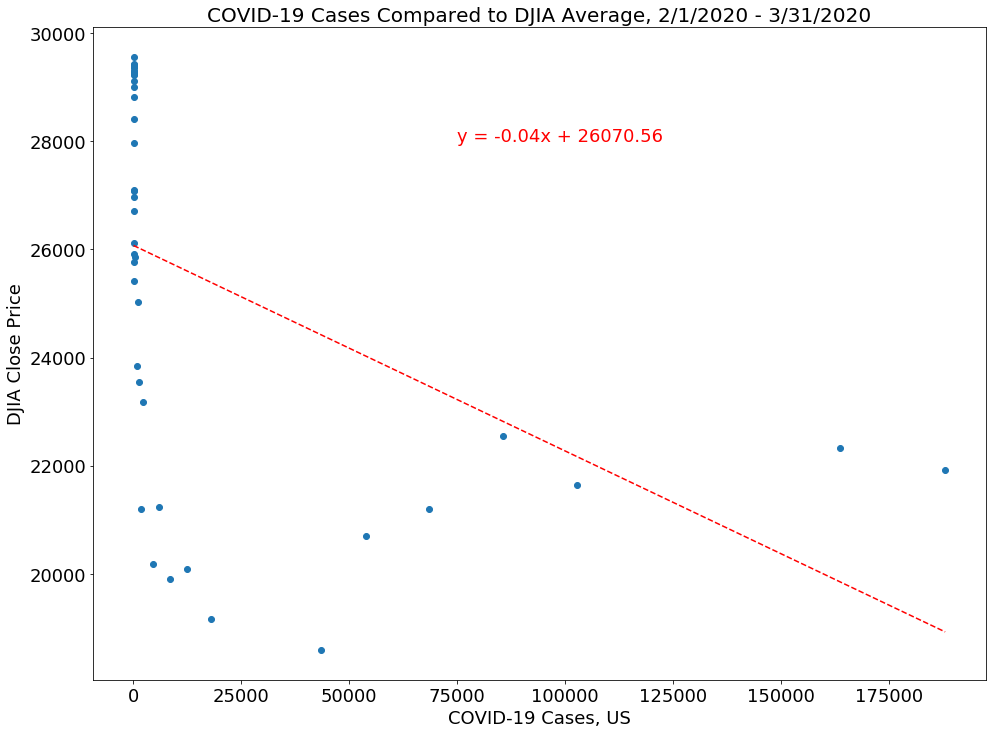

In [58]:
# Calculate the correlation coefficient and linear regression model for DJIA Closing Price and COVID-19 Cases
plt.figure(figsize=(16,12))
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(merged_df["Cases"], merged_df["Close"])
c_fit = c_slope * merged_df["Cases"] + c_int
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))
plt.scatter(merged_df["Cases"],merged_df["Close"])
plt.title("COVID-19 Cases Compared to DJIA Average, 2/1/2020 - 3/31/2020", size=20)
plt.plot(merged_df["Cases"], c_fit, "--",color="r")
plt.annotate(line_eq,(75000,28000),fontsize=15,color="r", size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("COVID-19 Cases, US", size=18)
plt.ylabel("DJIA Close Price", size=18)
plt.savefig("../output/CovidVsDJIA.png")
c_r2 = c_r * c_r
print(f"R-squared: {c_r2}")
print(f"P Value:{c_p}")
plt.show()

## The R-squared value means that this linear regression accounts for approximately 20% of the variation around its mean within the data, and therefore the correlation is most likely not linear; the P-value means that there is less than a 1% chance that the variation is random.